# PID Controller Testing

This notebook tests the PID controller implementation used in the boat simulator.


In [1]:
# Install dependencies
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
"""Robot Arm Test implementation for PID Controller"""

from abc import ABC, abstractmethod
from typing import Any, List


from boat_simulator.common.types import Scalar
from boat_simulator.common.utils import bound_to_180
from boat_simulator.nodes.low_level_control.control import RobotPID

GRAVITY = 9.8


class RobotArm:
    # Private class member defaults
    __mass: float = 0.0
    __target_position: Scalar = 0.0
    __current_position: Scalar = 0.0
    __time_period: Scalar = 0.0
    __position_log: List[Scalar] = list()
    __time_log: List[Scalar] = list()

    def __init__(
        self,
        mass: float,
        target_position: Scalar,
        current_position: Scalar,
        time_period: Scalar,
        position_log: list,
        time_log: list,
    ):
        self.__mass = mass
        self.__target_position = target_position
        self.__current_position = current_position
        self.__time_period = time_period
        self.__position_log = position_log
        self.__time_log = time_log

    def run(
        self,
        count: int,
        controller: RobotPID,
        force: float,
        velocity: float,
    ) -> Scalar:
        weight = self.__mass * GRAVITY
        running_time = 0
        prev_position = self.__current_position
        prev_velocity = 0
        prev_acceleration = 0
        for _ in range(count):
            feedback = controller.step(prev_position, self.target_position)

            acceleration = (weight - force) / self.__mass

            velocity = prev_velocity + (prev_acceleration * self.__time_period)

            accel_comp = (prev_acceleration * (self.__time_period**2)) / 2

            position = prev_position + (prev_velocity * self.__time_period) + accel_comp

            self.__position_log.append(position)
            self.__time_log.append(running_time)

            running_time += self.__time_period
            force += feedback

            self.__current_position = position
            prev_position = position
            prev_velocity = velocity
            prev_acceleration = acceleration

        return force

    @property
    def mass(self) -> float:
        return self.__mass

    @property
    def target_position(self) -> Scalar:
        return self.__target_position

    @property
    def current_position(self) -> Scalar:
        return self.__current_position

    @property
    def time_period(self) -> Scalar:
        return self.__time_period

    @property
    def position_log(self) -> List[Scalar]:
        return self.__position_log

    @property
    def time_log(self) -> List[Scalar]:
        return self.__time_log

    #


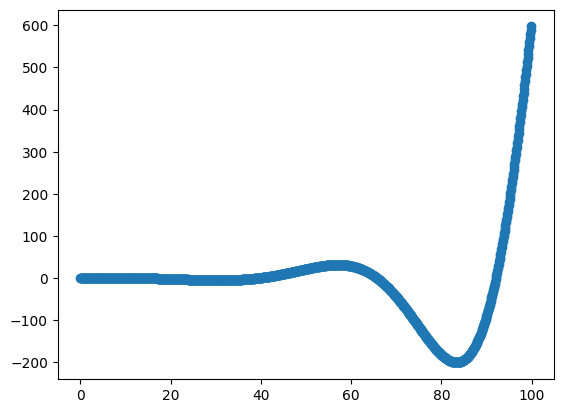

In [63]:
from matplotlib import pyplot as plt

test = RobotPID(
    kp=0.000002690,
    ki=0,
    kd=0,
    time_period=0.1,
    buf_size=50,
    error_timeseries=[],
    last_error=5,
    integral_sum=0,
)
robot = RobotArm(
    mass=0.01,
    target_position=0,
    current_position=50,
    time_period=0.1,
    position_log=[],
    time_log=[],
)

breakpoint()

graph = robot.run(1000, test, GRAVITY * 0.01, 0)

x = robot.time_log

# Y-axis values
y = robot.position_log
# Function to plot
plt.scatter(x, y)

# function to show the plot
plt.show()
